<a href="https://colab.research.google.com/github/diagonal-hamiltonian/repodynamite/blob/master/Autoencoder_equilateral_triangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder training for an equilateral triangular molecule


## 1. Creating a dataset of triangular molecules in 3-D space represented by 9 cordinates

## Goal: To create a dataset for and to reduce the latent space representation of a 3-atom molecule

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import pandas as pd

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

### Creating some base functions

In [6]:
import mpl_toolkits.mplot3d as plt3d
def Plot_2(v1, v2, v3, vv1, vv2, vv3):
  fig = plt.figure()
  fig.set_size_inches(5,5)
  ax = fig.add_subplot(111, projection='3d')
  
  X = np.array([v1,v2,v3])
  Y = np.array([vv1,vv2,vv3])
  
  l0x, ll0x = np.linspace(v1[0], v2[0], 50), np.linspace(vv1[0], vv2[0], 50)
  l1x, ll1x = np.linspace(v2[0], v3[0], 50), np.linspace(vv2[0], vv3[0], 50)
  l2x, ll2x = np.linspace(v3[0], v1[0], 50), np.linspace(vv3[0], vv1[0], 50)
  l0y, ll0y = np.linspace(v1[1], v2[1], 50), np.linspace(vv1[1], vv2[1], 50)
  l1y, ll1y = np.linspace(v2[1], v3[1], 50), np.linspace(vv2[1], vv3[1], 50)
  l2y, ll2y = np.linspace(v3[1], v1[1], 50), np.linspace(vv3[1], vv1[1], 50)
  l0z, ll0z = np.linspace(v1[2], v2[2], 50), np.linspace(vv1[2], vv2[2], 50)
  l1z, ll1z = np.linspace(v2[2], v3[2], 50), np.linspace(vv2[2], vv3[2], 50)
  l2z, ll2z = np.linspace(v3[2], v1[2], 50), np.linspace(vv3[2], vv1[2], 50)

  #Drawing lines
  ax.scatter(l0x, l0y, l0z, color='red', marker='s', s = 1, alpha = 0.1)
  ax.scatter(l1x, l1y, l1z, color='red', marker='s', s = 1, alpha = 0.1)
  ax.scatter(l2x, l2y, l2z, color='red', marker='s', s = 1, alpha = 0.1)
  ax.scatter(ll0x, ll0y, ll0z, color='black', marker='s', s = 1, alpha = 0.1)
  ax.scatter(ll1x, ll1y, ll1z, color='black', marker='s', s = 1, alpha = 0.1)
  ax.scatter(ll2x, ll2y, ll2z, color='black', marker='s', s = 1, alpha = 0.1)

  #plot the nodes
  for x, y, z in X:
    ax.scatter(x, y, z, color='red', marker='o', s=30)
  for x, y, z in Y:
    ax.scatter(x, y, z, color='black', marker='o', s=30)

  ax.scatter(0, 0, 0, color='blue', marker='s', s = 0.01 )
  ax.scatter(1, 0, 0, color='blue', marker='s', s = 0.01 )
  ax.scatter(0, 1, 0, color='blue', marker='s', s = 0.01 )
  ax.scatter(0, 0, 1, color='blue', marker='s', s = 0.01 )
  ax.scatter(1, 1, 1, color='blue', marker='s', s = 0.01 )

In [7]:
def Rotate_translate(v1_in, v2_in, v3_in, a):
  r = np.array(2*np.pi*np.random.random_sample((3,))) #Random rotation vector
  t = np.array(np.random.random_sample((3,))) + a     #Random translation vector, +1 is to keep all terms positive and avoid 0

  return Rotation(v1_in, v2_in, v3_in, r) + t #Vector rotated and translated in space

In [8]:
#r contains the standard euler angles in degrees
from scipy.spatial.transform import Rotation as R
def Rotation(v1, v2, v3, r): 
  r = R.from_rotvec( r )

  v_1r = r.apply(v1)
  v_2r = r.apply(v2)
  v_3r = r.apply(v3)
  
  return v_1r, v_2r, v_3r

In [9]:
#This is so there is no bias in the dataset from initializing the vectors
def random_init_vecs(v10, v20, v30):
  ran = np.random.randint(0,6)
  
  if ran == 0:
    return v10,v20,v30
  elif ran ==1:
    return v10,v30,v20
  elif ran ==2:
    return v20,v10,v30
  elif ran ==3:
    return v20,v30,v10
  elif ran ==4:
    return v30,v20,v10
  elif ran ==5:
    return v30,v10,v20



### Creating a random dataset of triangular points

In [10]:
a=1.
DATA_SIZE = 200000
v10 = np.array([0,0,0])
v20 = np.array([a/2., (3**0.5)*a/2., 0])
v30 = np.array([0, a, 0])

In [11]:
df=pd.DataFrame(columns=['x1','y1','z1','x2','y2','z2','x3','y3','z3'])

for i in range(DATA_SIZE):
  v1_in, v2_in, v3_in = v10 ,v20 ,v30
  v1_rt, v2_rt, v3_rt = Rotate_translate(v1_in, v2_in, v3_in, a)
  df = df.append({'x1':v1_rt[0], 'y1':v1_rt[1], 'z1':v1_rt[2],'x2':v2_rt[0],'y2':v2_rt[1],'z2':v2_rt[2],'x3':v3_rt[0],'y3':v3_rt[1],'z3':v3_rt[2]}, ignore_index=True)

In [12]:
df.min()

x1    1.000013
y1    1.000002
z1    1.000009
x2    0.036632
y2    0.016632
z2    0.169428
x3    0.026378
y3    0.009099
z3    0.009890
dtype: float64

In [13]:
df.to_csv('/content/training/datapoints' + str(DATA_SIZE)+".csv")

### Processing data


In [ ]:
df = pd.read_csv('/content/training/datapoints' + str(DATA_SIZE)+".csv")

In [60]:
x_t = df.to_numpy()

# Splitting the array into validation, training, and test sets
x_train, x_val, x_test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_test = x_test.to_numpy()
print(len(x_train),len(x_test), len(x_val))
# For our autoencoder we are not interested in labels


120000 40000 40000


In [62]:
v1,v2,v3 = np.array_split(x_test[4] , 3)
print(np.linalg.norm(v1-v2),
np.linalg.norm(v1-v3))

1.0 1.0


In [63]:
# Normalize all values between 0 and 1 
max = x_t.max()
x_train = x_train.astype('float32') / max
x_val = x_val.astype('float32') / max
x_test = x_test.astype('float32') / max

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(x_train.max())

(120000, 9)
(40000, 9)
(40000, 9)
0.9998754


In [64]:
v1,v2,v3 = np.array_split(x_test[1] , 3)
print(np.linalg.norm(v1-v2),
np.linalg.norm(v3-v1))

0.33341464 0.33341467


## 2. Building the model

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 80        
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 81        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


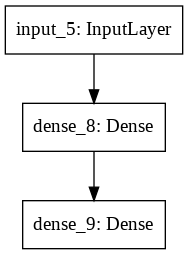

In [80]:
latent_dim = 8
input_img = Input(shape=(9,))

# Econder
encoded = Dense(latent_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(9, activation='sigmoid')(encoded)

# Model
autoencoder = Model(input_img, decoded)

# Visualise the model
autoencoder.summary()
keras.utils.plot_model(autoencoder)

## 3. Compiling the model

In [81]:
opt = keras.optimizers.Adam(learning_rate=.001)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy', metrics =['accuracy'])

## 4. Training the model

In [82]:
history = autoencoder.fit(x_train, x_train,     # For autoencoders input data = target data
                epochs=20,
                batch_size=16,
                validation_data=(x_val, x_val),
                shuffle=True)

Epoch 1/20
7500/7500 [==============================] - 8s 1ms/step - loss: 0.6295 - accuracy: 0.7223 - val_loss: 0.6224 - val_accuracy: 0.8354
Epoch 2/20
7500/7500 [==============================] - 8s 1ms/step - loss: 0.6216 - accuracy: 0.8469 - val_loss: 0.6213 - val_accuracy: 0.8603
Epoch 3/20
7500/7500 [==============================] - 8s 1ms/step - loss: 0.6209 - accuracy: 0.8626 - val_loss: 0.6211 - val_accuracy: 0.8685
Epoch 4/20
7500/7500 [==============================] - 8s 1ms/step - loss: 0.6209 - accuracy: 0.8652 - val_loss: 0.6211 - val_accuracy: 0.8643
Epoch 5/20
7500/7500 [==============================] - 8s 1ms/step - loss: 0.6209 - accuracy: 0.8652 - val_loss: 0.6211 - val_accuracy: 0.8559
Epoch 6/20
7500/7500 [==============================] - 8s 1ms/step - loss: 0.6209 - accuracy: 0.8662 - val_loss: 0.6211 - val_accuracy: 0.8657
Epoch 7/20
7500/7500 [==============================] - 8s 1ms/step - loss: 0.6209 - accuracy: 0.8661 - val_loss: 0.6211 - val_accuracy:

## 5. Evaluate the model

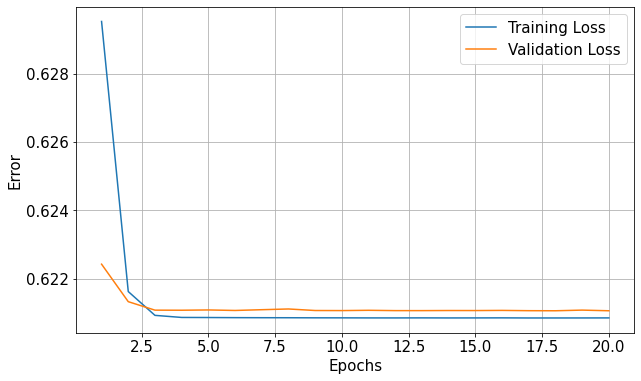

In [83]:
# Plot Training Loss and Validation Loss

plt.figure(figsize=(10,6))
plt.plot(range(1, len(history.history['loss'])+1,1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['val_loss'])+1,1), history.history['val_loss'], label='Validation Loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid()

Reconstructed lenght: 0.3427461 , 0.13180077 , 0.36737892 

Original lenght: 0.33341467 , 0.1725881 , 0.33341464 

0.
 [0.59199136 0.34675437 0.36986694] [0.66382277 0.1940184  0.6681736 ] [0.73774713 0.10503668 0.605016  ] 
 [0.6350665 0.3479111 0.3732591] [0.596592   0.1771137  0.65700775] [0.7359199  0.10824947 0.5819604 ] 


Reconstructed lenght: 0.31846073 , 0.12902822 , 0.30488387 

Original lenght: 0.33341464 , 0.17258817 , 0.33341467 

1.
 [0.4564622  0.61477923 0.5984612 ] [0.57822937 0.89391136 0.6916023 ] [0.45043996 0.89896894 0.708707  ] 
 [0.43113542 0.6343435  0.59413004] [0.59424794 0.9218295  0.6378498 ] [0.45243517 0.9356751  0.7352362 ] 


Reconstructed lenght: 0.3316452 , 0.12151268 , 0.35537833 

Original lenght: 0.33341467 , 0.1725881 , 0.33341467 

2.
 [0.54412496 0.6582978  0.53998595] [0.47031716 0.8947872  0.7604711 ] [0.3977068 0.8186728 0.821296 ] 
 [0.556    0.65668  0.567884] [0.43125296 0.92706287 0.71787274] [0.44191477 0.8078976  0.84226173] 


Reconstr

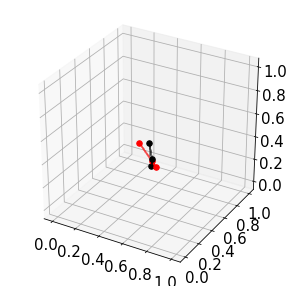

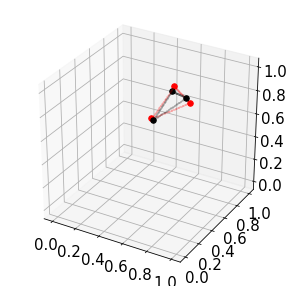

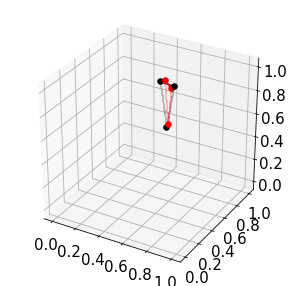

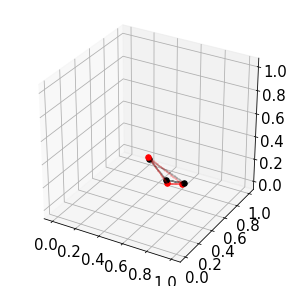

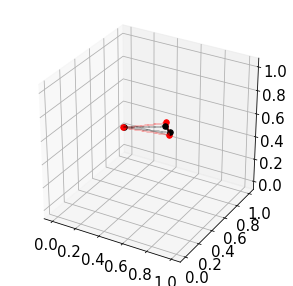

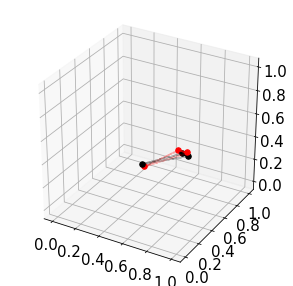

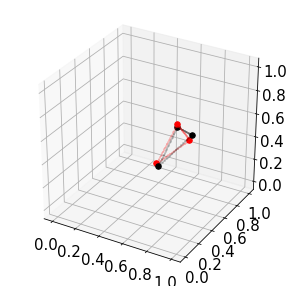

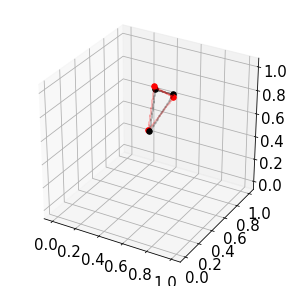

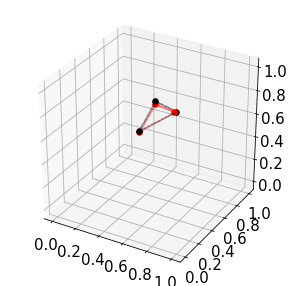

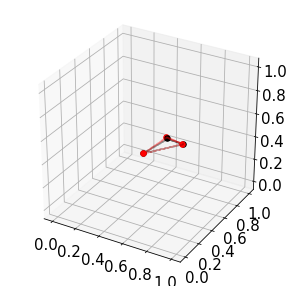

In [84]:
# Reconstruct test images
reconstructed = autoencoder.predict(x_test)

for i in range(10):
    # Display original and reconstructed
    vx,vy,vz = np.array_split(x_test[i] , 3)
    vvx,vvy,vvz = np.array_split(reconstructed[i] , 3)
    print('Reconstructed lenght:',np.linalg.norm(vvx-vvy),',', np.linalg.norm(vvy-vvz),',',np.linalg.norm(vvz-vvx),'\n')
    print('Original lenght:',np.linalg.norm(vx-vy),',', np.linalg.norm(vy-vz),',',np.linalg.norm(vz-vx),'\n')

    print('%d.\n'%(i),vvx,vvy,vvz,'\n',vx,vy,vz,'\n\n')
    Plot_2(vx,vy,vz,vvx,vvy,vvz)

In [ ]:
np.linalg.norm(v)


In [ ]:
np.linalg.norm(np.array([0.42589706, 0.49721348, 0.4096665 ]) - np.array([0.66229016, 0.7318808,  0.42432597]))

The NN has learned that this is an equilatrial triangle